In [1]:
import torch
from torch.utils.data import DataLoader, random_split, Dataset
from torchvision import transforms
import torch.nn as nn
from datasets import load_dataset
import matplotlib.pyplot as plt
import json
import numpy as np

# Set the seed for PyTorch
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the seed for NumPy
np.random.seed(42)

# Define transformations for the training data
transform = transforms.Compose([
    # transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

# Load the dataset
dataset = load_dataset("zh-plus/tiny-imagenet", split="train")
with open('./image_indexes.json') as f:
    indexes = json.load(f)

# Define a function to check the shape of the image
def filter_function(sample):
    image_shape = sample['image'].mode
    return image_shape == 'RGB'

# Filter the dataset to remove samples with shape [1, 64, 64]
dataset = dataset.filter(filter_function)

# Define a custom dataset class to apply transformations
class CustomDataset(Dataset):
    def __init__(self, hf_dataset, transform=None):
        self.hf_dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.hf_dataset)

    def __getitem__(self, idx):
        image = self.hf_dataset[idx]['image']
        if self.transform:
            image = self.transform(image)
        return image, self.hf_dataset[idx]['label']

# Convert the Hugging Face dataset to a PyTorch Dataset
transformed_dataset = CustomDataset(dataset, transform=transform)

c:\Users\itayk\miniconda3\envs\Dcv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# class FCAutoencoder20(nn.Module):
#     def __init__(self, input_dim=64*64*3, hidden_dim=1024, output_dim=64*64*3, init_w=True, activation='leaky_relu'):
#         super().__init__()

#         # All layers 1024 width
#         self.fc1 = nn.Linear(input_dim, hidden_dim * 8)
#         self.fc2 = nn.Linear(hidden_dim * 8, hidden_dim * 6)
#         self.fc3 = nn.Linear(hidden_dim * 6, hidden_dim * 4)
#         self.fc4 = nn.Linear(hidden_dim * 4, hidden_dim * 2)
#         self.fc5 = nn.Linear(hidden_dim * 2, hidden_dim)
#         # Decoder: affine function
#         self.fc6 = nn.Linear(hidden_dim, hidden_dim * 2)
#         self.fc7 = nn.Linear(hidden_dim * 2, hidden_dim * 4)
#         self.fc8 = nn.Linear(hidden_dim * 4, hidden_dim * 6)
#         self.fc9 = nn.Linear(hidden_dim * 6, hidden_dim * 8)
#         self.fc10 = nn.Linear(hidden_dim * 8, output_dim)
#         if activation == 'leaky_relu':
#             self.activation = nn.LeakyReLU(0.2)
#         elif activation == 'prelu':
#             self.activation = nn.PReLU()
#         if init_w:
#             self.apply(self._init_weights)

#     def forward(self, x):
#         # Encoder
#         out = self.activation(self.fc1(x))
#         out = self.activation(self.fc2(out))
#         out = self.activation(self.fc3(out))
#         out = self.activation(self.fc4(out))
#         out = self.activation(self.fc5(out))

#         # Decoder:
#         out = self.activation(self.fc6(out))
#         out = self.activation(self.fc7(out))
#         out = self.activation(self.fc8(out))
#         out = self.activation(self.fc9(out))
#         out = self.activation(self.fc10(out))
#         return out

#     def _init_weights(self, module):
#         if isinstance(module, nn.Linear):
#             module.weight.data.uniform_(-2e-2, 2e-2)

In [3]:
# class FCAutoencoder(nn.Module):
#     def __init__(self, input_dim=64*64*3, hidden_dim=1024, output_dim=64*64*3, init_w=True, activation='leaky_relu'):
#         super().__init__()

#         # All layers 1024 width
#         self.fc1 = nn.Linear(input_dim, hidden_dim)
#         self.fc2 = nn.Linear(hidden_dim, hidden_dim)
#         self.fc3 = nn.Linear(hidden_dim, hidden_dim)
#         self.fc4 = nn.Linear(hidden_dim, hidden_dim)
#         self.fc5 = nn.Linear(hidden_dim, hidden_dim)
#         self.fc6 = nn.Linear(hidden_dim, hidden_dim)
#         self.fc7 = nn.Linear(hidden_dim, hidden_dim)
#         self.fc8 = nn.Linear(hidden_dim, hidden_dim)
#         # Decoder: affine function
#         self.fc9 = nn.Linear(hidden_dim, hidden_dim)
#         self.fc10 = nn.Linear(hidden_dim, hidden_dim)
#         self.fc11 = nn.Linear(hidden_dim, hidden_dim)
#         self.fc12 = nn.Linear(hidden_dim, hidden_dim)
#         self.fc13 = nn.Linear(hidden_dim, hidden_dim)
#         self.fc14 = nn.Linear(hidden_dim, hidden_dim)
#         self.fc15 = nn.Linear(hidden_dim, output_dim)
#         if activation == 'leaky_relu':
#             self.activation = nn.LeakyReLU(0.2)
#         elif activation == 'prelu':
#             self.activation = nn.PReLU()
#         if init_w:
#             self.apply(self._init_weights)

#     def forward(self, x):
#         # Encoder
#         out = self.activation(self.fc1(x))
#         out = self.activation(self.fc2(out))
#         out = self.activation(self.fc3(out))
#         out = self.activation(self.fc4(out))
#         out = self.activation(self.fc5(out))
#         out = self.activation(self.fc6(out))
#         out = self.activation(self.fc7(out))
#         out = self.activation(self.fc8(out))
        
#         # Decoder
#         out = self.activation(self.fc9(out))
#         out = self.activation(self.fc10(out))
#         out = self.activation(self.fc11(out))
#         out = self.activation(self.fc12(out))
#         out = self.activation(self.fc13(out))
#         out = self.activation(self.fc14(out))
#         out = self.fc15(out)  # Final output layer without activation to match the original dimension
        
#         return out

#     def _init_weights(self, module):
#         if isinstance(module, nn.Linear):
#             module.weight.data.uniform_(-2e-2, 2e-2)

In [4]:


# class FCAutoencoder(nn.Module):
#     def __init__(self, input_dim=64*64*3, hidden_dim=1024, output_dim=64*64*3, init_w=True, activation='leaky_relu'):
#         super().__init__()

#         # All layers 1024 width
#         self.fc1 = nn.Linear(input_dim, hidden_dim)
#         self.bn1 = nn.BatchNorm1d(hidden_dim)
#         self.fc2 = nn.Linear(hidden_dim, hidden_dim)
#         self.bn2 = nn.BatchNorm1d(hidden_dim)
#         self.fc3 = nn.Linear(hidden_dim, hidden_dim)
#         self.bn3 = nn.BatchNorm1d(hidden_dim)
#         self.fc4 = nn.Linear(hidden_dim, hidden_dim)
#         self.bn4 = nn.BatchNorm1d(hidden_dim)
#         self.fc5 = nn.Linear(hidden_dim, hidden_dim)
#         self.bn5 = nn.BatchNorm1d(hidden_dim)
#         # Decoder: affine function
#         self.fc6 = nn.Linear(hidden_dim, hidden_dim)
#         self.bn6 = nn.BatchNorm1d(hidden_dim)
#         self.fc7 = nn.Linear(hidden_dim, hidden_dim)
#         self.bn7 = nn.BatchNorm1d(hidden_dim)
#         self.fc8 = nn.Linear(hidden_dim, hidden_dim)
#         self.bn8 = nn.BatchNorm1d(hidden_dim)
#         self.fc9 = nn.Linear(hidden_dim, hidden_dim)
#         self.bn9 = nn.BatchNorm1d(hidden_dim)
#         self.fc10 = nn.Linear(hidden_dim, output_dim)

#         if activation == 'leaky_relu':
#             self.activation = nn.LeakyReLU(0.2)
#         elif activation == 'prelu':
#             self.activation = nn.PReLU()

#         if init_w:
#             self.apply(self._init_weights)

#     def forward(self, x):
#         # Encoder with residual connections and normalization
#         out = self.activation(self.bn1(self.fc1(x)))
#         out = out + self.activation(self.bn2(self.fc2(out)))  # Skip connection
#         out = out + self.activation(self.bn3(self.fc3(out)))  # Skip connection
#         out = out + self.activation(self.bn4(self.fc4(out)))  # Skip connection
#         out = out + self.activation(self.bn5(self.fc5(out)))  # Skip connection

#         # Decoder with residual connections and normalization
#         out = out + self.activation(self.bn6(self.fc6(out)))  # Skip connection
#         out = out + self.activation(self.bn7(self.fc7(out)))  # Skip connection
#         out = out + self.activation(self.bn8(self.fc8(out)))  # Skip connection
#         out = out + self.activation(self.bn9(self.fc9(out)))  # Skip connection
#         out = self.fc10(out)
#         return out

#     def _init_weights(self, module):
#         if isinstance(module, nn.Linear):
#             module.weight.data.uniform_(-2e-2, 2e-2)


In [5]:
class FCAutoencoder(nn.Module):
    def __init__(self, input_dim=64*64*3, hidden_dim=1024, output_dim=64*64*3, init_w=True, activation='leaky_relu'):
        super().__init__()

        # All layers 1024 width
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, hidden_dim)
        # Decoder: affine function
        self.fc6 = nn.Linear(hidden_dim, hidden_dim)
        self.fc7 = nn.Linear(hidden_dim, hidden_dim)
        self.fc8 = nn.Linear(hidden_dim, hidden_dim)
        self.fc9 = nn.Linear(hidden_dim, hidden_dim)
        self.fc10 = nn.Linear(hidden_dim, output_dim)
        if activation == 'leaky_relu':
            self.activation = nn.LeakyReLU(0.2)
        elif activation == 'prelu':
            self.activation = nn.PReLU()
        if init_w:
            self.apply(self._init_weights)

    def forward(self, x):
        # Encoder
        out = self.activation(self.fc1(x))
        out = self.activation(self.fc2(out))
        out = self.activation(self.fc3(out))
        out = self.activation(self.fc4(out))
        out = self.activation(self.fc5(out))

        # Decoder:
        out = self.activation(self.fc6(out))
        out = self.activation(self.fc7(out))
        out = self.activation(self.fc8(out))
        out = self.activation(self.fc9(out))
        out = self.activation(self.fc10(out))
        return out

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.uniform_(-2e-2, 2e-2)

In [6]:
# Use a subset of 600 images for training
train_size = 600
train_dataset, test_dataset = random_split(transformed_dataset, [train_size, len(transformed_dataset) - train_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

tensor(46)


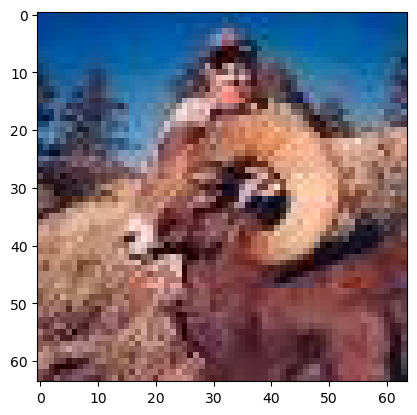

In [7]:
for images, labels in train_loader:
    img = images[0].permute(1, 2, 0).numpy()
    label = labels[0]
    print(label)
    plt.imshow(img)
    break

In [ ]:
import torch.optim as optim
import torch
from tqdm import tqdm

# Initialize models
model_leaky_relu = FCAutoencoder(activation='leaky_relu')
model_prelu      = FCAutoencoder(activation='prelu')

# Define loss function and optimizers
criterion = nn.MSELoss()
# optimizer_leaky_relu = optim.Adam(model_leaky_relu.parameters(), lr= 0.5)
optimizer_leaky_relu = optim.RMSprop(model_leaky_relu.parameters(), lr= 0.00002)
optimizer_leaky_relu = optim.Adam(model_leaky_relu.parameters(),    lr= 0.0000011)
# optimizer_prelu = optim.Adam(model_prelu.parameters(), lr=0.1)
# optimizer_prelu = optim.Adam(model_prelu.parameters(), lr=0.0001)
# optimizer_prelu = optim.RMSprop(model_prelu.parameters(), lr=0.0001)

num_epochs = 100_000

# Training loop
def train_model(model, optimizer, dataloader, target_loss=1e-8):
    model.train()
    with tqdm(total=num_epochs, desc="Processing") as pbar:
        for epoch in range(num_epochs):
            running_loss = 0.0
            for images, _ in dataloader:
                images = images.view(images.size(0), -1)

                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, images)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()
            
            avg_loss = running_loss / len(dataloader)
            pbar.set_postfix({'Loss:' : f'{avg_loss}'})
            pbar.update(1)

            # print()
            
            if epoch % 100 == 0 and epoch != 0:
                torch.save(model.state_dict(), f'./models/epoch_{epoch}_model_{avg_loss:.8f}.pth')

            # Save intermediate models
            if avg_loss <= target_loss :
                torch.save(model.state_dict(), f'model_{avg_loss:.8f}.pth')
                break

# Train both models
train_model(model_leaky_relu, optimizer_leaky_relu, train_loader)
# train_model(model_prelu, optimizer_prelu, train_loader)
